In [1]:
from pathlib import Path
import numpy as np

In [2]:
RUN_DIR = Path("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/runs")
TRJ_DIR = Path("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/wham/trjs")
WHAM_PATH = Path("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/wham")
NWINDOWS_DIST = 12
NWINDOWS_ANG  = 18

In [3]:
DISTS = np.linspace(0, 2.5, NWINDOWS_DIST)
ANGS1 = np.linspace(0, np.pi, NWINDOWS_ANG)
ANGS2 = ANGS1[1:-1]*-1
ANGS2 = ANGS2[::-1]
ANGS = np.concatenate((ANGS1, ANGS2), axis=0)

In [15]:
metadata_cnt = []
min_d = np.inf
max_d = -np.inf
min_a = np.inf
max_a = -np.inf

for i, ang in enumerate(ANGS):
    for j, dist in enumerate(DISTS):
        trj_path = RUN_DIR/f"{i}_{j}"/f"us_{i}_{j}.dat"
        trj_cnt = []
        with open(trj_path) as f:
            while True:
                line = f.readline()
                if line:
                    if line[0] == "#":
                       continue
                    line = [float(k) for k in line.split()]
                    if i in [0, 1, 33]:
                        line[2] = line[3] - np.pi/2
                    elif i in [17, 16, 18]:
                       line[2] = line[3] + np.pi/2
                       if line[2] > np.pi:
                           line[2] = -np.pi + (line[2]-np.pi)
                    elif i > 17:
                       line[2] *= -1
                    trj_cnt.append(f"{line[0]:.6f}   {line[1]:.6f}   {line[2]:.6f}\n")
                    if line[1] < min_d:
                        min_d = line[1]
                    elif line[1] > max_d:
                        max_d = line[1]
                    if line[2] < min_a:
                        min_a = line[2]
                    elif line[2] > max_a:
                        max_a = line[2]
                    
                else:
                   break
        new_trj_path = TRJ_DIR/f"us_{i}_{j}.dat"
        #with open(new_trj_path, 'w') as f:
        #    f.writelines(trj_cnt)
        #metadata_cnt.append(f"{new_trj_path}   {dist:.6f}   {ang:.6f}   250   250\n")

#with open(WHAM_PATH/"metadata.dat", 'w') as f:
#    f.writelines(metadata_cnt)
print(min_d, max_d)
print(min_a, max_a)

0.222015 2.949735
-3.14159198038469 3.1415913267948965


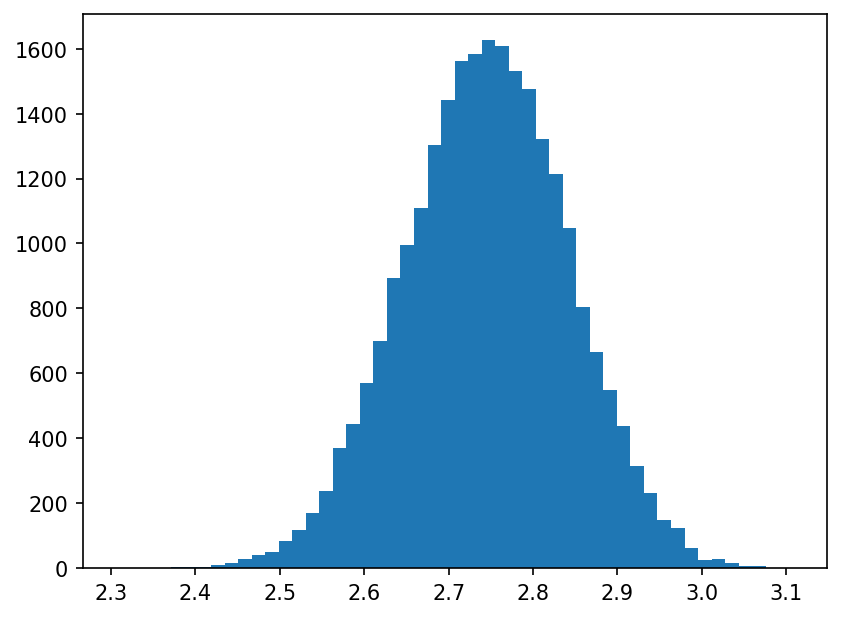

In [10]:
import matplotlib.pyplot as plt

data_in = []
with open("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/wham/trjs/us_15_11.dat") as f:
    lines_in = f.readlines()
    for line in lines_in:
        data_in.append([float(i) for i in line.split()])
data = np.array(data_in)

fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data[:, 2], bins=50)


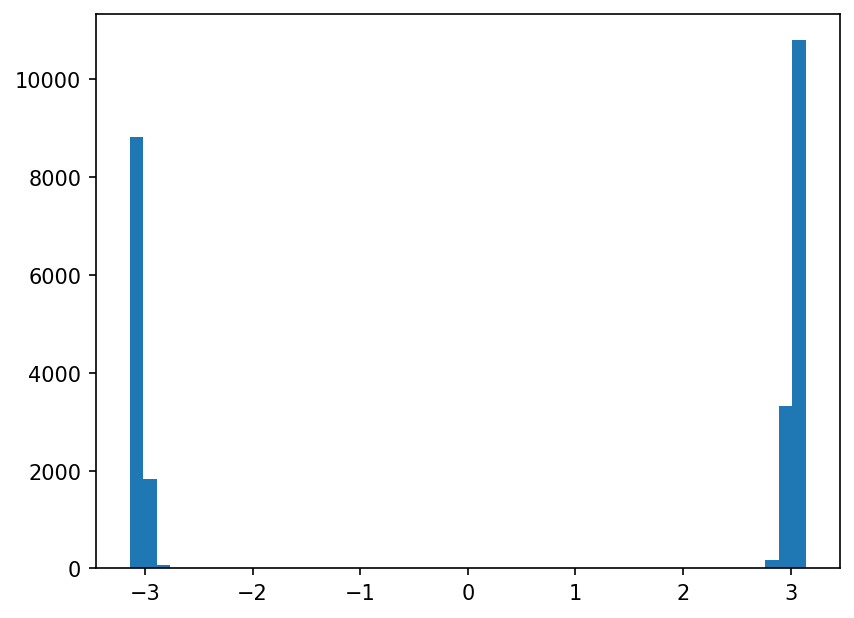

In [11]:
import matplotlib.pyplot as plt

data_in = []
with open("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/wham/trjs/us_17_2.dat") as f:
    lines_in = f.readlines()
    for line in lines_in:
        data_in.append([float(i) for i in line.split()])
data = np.array(data_in)

fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data[:, 2], bins=50)


In [4]:
import pandas as pd

def read_as_pandas(fname):
    data = {}
    with open(fname, 'r') as f:
        fields = f.readline()[:-1].split(" ")[2:] # last char is '/n' and the first two are '#!' and 'FIELDS'
        for field in fields: # add fields to the colvars dict
            data[field] = []
        line_cnt = 0
        while (True): # read up to LINE_LIM lines
            line = f.readline()
            if not line:
                break
            if line[0] == "#": # Don't read comments
                continue
            
            line_list = line.split()
            try: # account for incomplete files (useful when the sims is still running)
                for i, field in enumerate(fields):
                    data[field].append(float(line_list[i]))
            except:
                break
            finally:
                line_cnt += 1
    return pd.DataFrame(data)

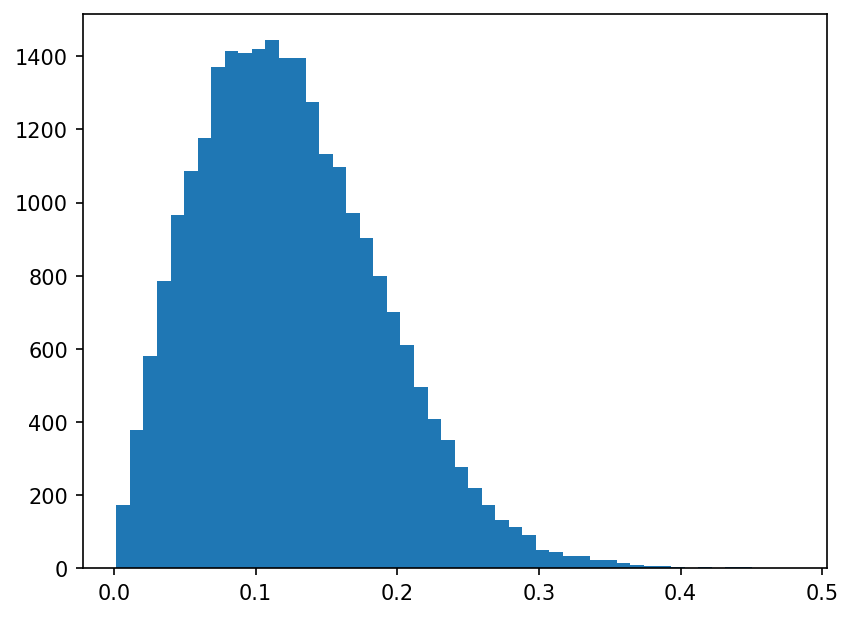

In [13]:
import matplotlib.pyplot as plt

data_in = read_as_pandas("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/runs/0_10/us_0_10.dat")
fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data_in.ang, bins=50)


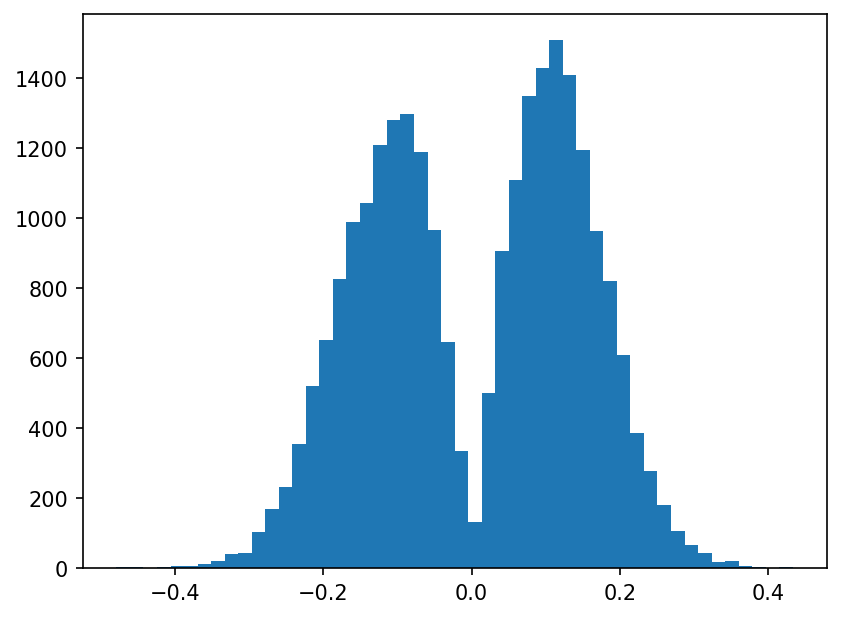

In [5]:
import matplotlib.pyplot as plt

data_in = read_as_pandas("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/runs/0_10/us_0_10.dat")
fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data_in.ang*np.abs(data_in.dc)/data_in.dc, bins=50)

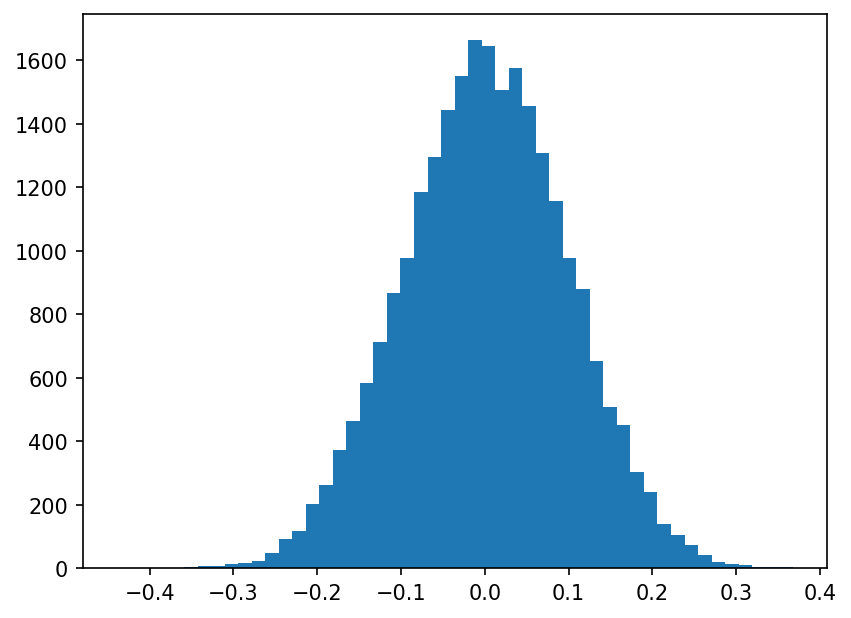

In [6]:
import matplotlib.pyplot as plt

data_in = read_as_pandas("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/runs/0_10/us_0_10.dat")
fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data_in.ang2-np.pi/2, bins=50)

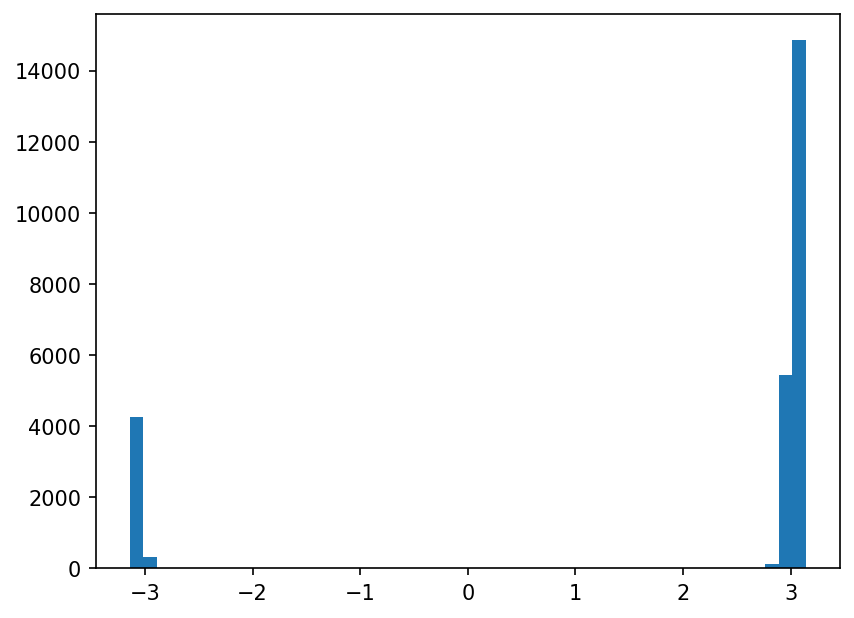

In [14]:
import matplotlib.pyplot as plt

data_in = []
with open("/project2/andrewferguson/armin/FE_DATA/GHGGF_FEN/complex/usample_2d/5ns/wham/trjs/us_17_0.dat") as f:
    lines_in = f.readlines()
    for line in lines_in:
        data_in.append([float(i) for i in line.split()])
data = np.array(data_in)

fig, ax = plt.subplots(1, 1, dpi=150)
plot = ax.hist(data[:, 2], bins=50)
